# Sistemas de recomendación
### Carga de datos de Movie Lens

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/ml-100k/u.data.csv", sep="\t", header=None)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df.columns = ["UserID", "ItemID", "Rating", "TimeStamp"]

In [6]:
df.head()

,UserID,ItemID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Análisis exploratorio de los ítems

In [7]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

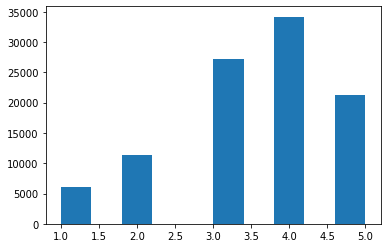

In [9]:
plt.hist(df.Rating)# columna Rating 


(array([11459.,  5724., 19359.,  9315.,  9396., 10083.,  6175.,  9603.,
        10048.,  8838.]),
 array([8.74724710e+08, 8.76580903e+08, 8.78437096e+08, 8.80293288e+08,
        8.82149481e+08, 8.84005674e+08, 8.85861867e+08, 8.87718060e+08,
        8.89574252e+08, 8.91430445e+08, 8.93286638e+08]),
 <a list of 10 Patch objects>)

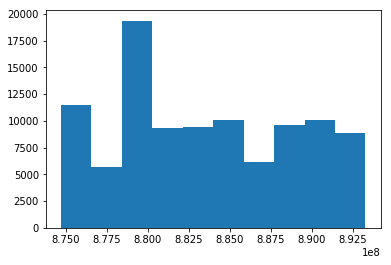

In [17]:
plt.hist(df.TimeStamp)

In [11]:
df.groupby(["Rating"]).count() # me cuenta todos los elementos del grupo "Rating"

,UserID,ItemID,TimeStamp
Rating,,,
1,6110,6110,6110
2,11370,11370,11370
3,27145,27145,27145
4,34174,34174,34174
5,21201,21201,21201


In [12]:
df.groupby(["Rating"])["UserID"].count()# solo cuenta del grupo el "UserID"

Rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: UserID, dtype: int64

In [13]:
df.groupby(["ItemID"])["ItemID"].count()# solo cuenta del grupo el "UserID"

ItemID
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: ItemID, Length: 1682, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

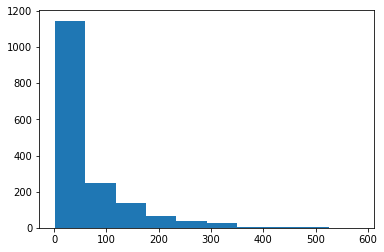

In [14]:
plt.hist(df.groupby(["ItemID"])["ItemID"].count())# genero un grafico del grupo "ItemID" y los cuenta

### Representación en forma matricial

In [24]:
import numpy as np

In [25]:
n_users = df.UserID.unique()
print(n_users)

[196 186  22 244 166 298 115 253 305   6  62 286 200 210 224 303 122 194
 291 234 119 167 299 308  95  38 102  63 160  50 301 225 290  97 157 181
 278 276   7  10 284 201 287 246 242 249  99 178 251  81 260  25  59  72
  87  42 292  20  13 138  60  57 223 189 243  92 241 254 293 127 222 267
  11   8 162 279 145  28 135  32  90 216 250 271 265 198 168 110  58 237
  94 128  44 264  41  82 262 174  43  84 269 259  85 213 121  49 155  68
 172  19 268   5  80  66  18  26 130 256   1  56  15 207 232  52 161 148
 125  83 272 151  54  16  91 294 229  36  70  14 295 233 214 192 100 307
 297 193 113 275 219 218 123 158 302  23 296  33 154  77 270 187 170 101
 184 112 133 215  69 104 240 144 191  61 142 177 203  21 197 134 180 236
 263 109  64 114 239 117  65 137 257 111 285  96 116  73 221 235 164 281
 182 129  45 131 230 126 231 280 288 152 217  79  75 245 282  78 118 283
 171 107 226 306 173 185 150 274 188  48 311 165 208   2 205 248  93 159
 146  29 156  37 141 195 108  47 255  89 140 190  2

In [26]:
n_users = df.UserID.unique().shape[0]# UserID.unique().shape[0] >> nos da el numero de usuarios 
n_users

943

In [27]:
n_items = df.ItemID.unique().shape[0] # ItemID.unique().shape[0] >> nos da el numero de peliculas
n_items

1682

In [28]:
ratings = np.zeros((n_users, n_items))# genera un matrix de Ceros (n_users x n_items))
print(ratings)

In [36]:
for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]

In [37]:
type(ratings)

numpy.ndarray

In [38]:
ratings.shape

(943, 1682)

In [39]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [48]:
(ratings.nonzero()[1])

array([   0,    1,    2, ..., 1187, 1227, 1329])

In [56]:
sparsity = float(len(ratings.nonzero()[0])) # ratings.nonzero()[0] >> cuantos no son Ceros en la posicion Cero
sparsity /= (ratings.shape[0]*ratings.shape[1]) # %  de exparceidad
sparsity *= 100
print("Coeficiente de sparseidad: {:4.2f}%".format(sparsity))

Coeficiente de sparseidad: 6.30%


### Crear conjuntos de entrenamiento y validación

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.3, random_state=42)
# test_size = 0.3 >> 30% para testing

In [60]:
ratings_train.shape

(660, 1682)

In [61]:
ratings_test.shape

(283, 1682)

## Filtro colaborativo basado en Usuarios
* Matriz de similaridad entre los usuarios (distancia del coseno).
* Predecir la valoración desconocida de un ítem *i* para un usuario activo *u* basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.
* Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.

In [62]:
import numpy as np
import sklearn

In [64]:
# NOS GENERA LA MATRIX DE SIMILARIDADES
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings_train)
# 1 - sklearn.metrics >> Para separar en 1 los mas sercanos y Cero para los lejanos 
print(sim_matrix)

[[1.         0.17448349 0.18009754 ... 0.13331459 0.17695593 0.21882481]
 [0.17448349 1.         0.07993097 ... 0.07175808 0.09552622 0.05512655]
 [0.18009754 0.07993097 1.         ... 0.0191736  0.02233385 0.10310785]
 ...
 [0.13331459 0.07175808 0.0191736  ... 1.         0.04853428 0.05142508]
 [0.17695593 0.09552622 0.02233385 ... 0.04853428 1.         0.1198022 ]
 [0.21882481 0.05512655 0.10310785 ... 0.05142508 0.1198022  1.        ]]


In [48]:
type(sim_matrix)

numpy.ndarray

In [49]:
sim_matrix.shape# 660 usuarios vs asi mismos

(660, 660)

In [50]:
sim_matrix # matris identidad (cada usuario esta 1 de si mismo)

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [51]:
users_predictions = sim_matrix.dot(ratings_train) / np.array([np.abs(sim_matrix).sum(axis=1)]).T

In [52]:
users_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [53]:
from sklearn.metrics import mean_squared_error

In [157]:
def get_mse(preds, actuals):
    if preds.shape[0] != actuals.shape[0]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)

In [55]:
get_mse(users_predictions, ratings_train)

7.878218313143215

In [56]:
get_mse(users_predictions, ratings_test)

8.745164067978985

## Filtro colaborativo basado en los KNN

In [57]:
from sklearn.neighbors import NearestNeighbors

In [87]:
k = 5

In [88]:
neighbors = NearestNeighbors(k, 'cosine')

In [89]:
neighbors.fit(ratings_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius='cosine')

In [90]:
top_k_distances, top_k_users = neighbors.kneighbors(ratings_train, return_distance=True)

In [91]:
top_k_distances.shape

(660, 5)

In [92]:
top_k_distances[0]

array([ 0.        , 41.71330723, 43.3474336 , 45.04442252, 45.04442252])

In [93]:
top_k_users.shape

(660, 5)

In [94]:
top_k_users[0]

array([  0, 211,  16, 583, 428])

In [95]:
users_predicts_k = np.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]):# para cada usuario del conjunto de entrenamiento
    users_predicts_k[i,:] = top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / np.array([np.abs(top_k_distances[i].T).sum(axis=0)]).T

In [96]:
users_predicts_k.shape

(660, 1682)

In [97]:
users_predicts_k

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74469557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.9753676 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [98]:
get_mse(users_predicts_k, ratings_train)

8.180803170774984

In [99]:
get_mse(users_predicts_k, ratings_test)

11.338914012692959

## Filtro colaborativo basado en Items

In [100]:
n_movies = ratings_train.shape[1]
n_movies

1682

In [101]:
neighbors = NearestNeighbors(n_movies, 'cosine')

In [102]:
neighbors.fit(ratings_train.T)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=1682, p=2,
         radius='cosine')

In [106]:
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [104]:
top_k_distances.shape

(1682, 1682)

In [119]:
top_k_distances

array([[ 0.        , 53.12249994, 54.38749856, ..., 77.08436936,
        77.39509028, 79.3473377 ],
       [ 0.        , 27.        , 27.29468813, ..., 72.18032973,
        75.65712128, 80.0874522 ],
       [ 0.        , 24.77902339, 25.05992817, ..., 72.09022125,
        75.27283707, 83.11437902],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 77.12976079,
        80.79603951, 88.63407922],
       [ 0.        ,  1.        ,  3.        , ..., 76.99350622,
        80.7403245 , 88.51553536],
       [ 0.        ,  1.        ,  3.        , ..., 77.03246069,
        80.66597796, 88.51553536]])

In [108]:
top_k_items.shape

(1682, 1682)

In [114]:
top_k_items

array([[   0,  120,  404, ...,  285,  312,  301],
       [   1,  575,  232, ...,  257,   99,   49],
       [   2,  742, 1094, ...,  180,   99,   49],
       ...,
       [1565, 1571, 1570, ...,  180,   99,   49],
       [1680, 1671, 1582, ...,  180,   99,   49],
       [1681, 1596, 1592, ...,  180,   99,   49]])

In [109]:
item_preds = ratings_train.dot(top_k_distances) / np.array([np.abs(top_k_distances).sum(axis=1)])

In [110]:
item_preds.shape

(660, 1682)

In [111]:
item_preds

array([[0.        , 0.31842643, 0.37009323, ..., 1.44850442, 1.4566397 ,
        1.54530823],
       [0.        , 0.0545379 , 0.06227954, ..., 0.20078701, 0.20112087,
        0.21332472],
       [0.        , 0.03522479, 0.04073126, ..., 0.18456903, 0.18654661,
        0.20076303],
       ...,
       [0.        , 0.08968346, 0.10313623, ..., 0.42050197, 0.4196067 ,
        0.45863507],
       [0.        , 0.25835756, 0.29918119, ..., 1.31043371, 1.32278067,
        1.41390683],
       [0.        , 0.07174777, 0.08538024, ..., 0.25535196, 0.25259645,
        0.26199652]])

In [112]:
get_mse(item_preds, ratings_train)

11.172565375125632

In [113]:
get_mse(item_preds, ratings_test)

11.876775601508902

### Filtrado colaborativo basado en KNN

In [120]:
k = 30
neighbors = NearestNeighbors(k, 'cosine')
neighbors.fit(ratings_train.T)
top_k_distances, top_k_items = neighbors.kneighbors(ratings_train.T, return_distance=True)

In [121]:
top_k_distances.shape

(1682, 30)

In [122]:
top_k_items[0]

array([  0, 120, 404, 116, 221, 150, 117, 180,   6, 741,  27,  94, 256,
       236, 124,  81,  24, 587, 227, 110, 234,  78, 203, 545,  70,  14,
        68, 596,  49, 143])

In [123]:
top_k_distances[0]

array([ 0.        , 53.12249994, 54.38749856, 55.50675635, 56.49778757,
       56.9473441 , 57.21013896, 57.81003373, 58.10335619, 58.16356248,
       58.19793811, 58.37807808, 58.70264049, 58.83876273, 58.97457079,
       59.52310476, 59.61543424, 59.84981203, 59.89156869, 59.94163828,
       60.15812497, 60.35726965, 60.37383539, 60.63002556, 60.86049622,
       61.11464636, 61.31883887, 61.37589103, 61.57109712, 61.80614856])

In [139]:
preds = np.zeros(ratings_train.T.shape)
for i in range(ratings_train.T.shape[0]):
    if(i%50==0):
        print("iter "+str(i))
    den = 1
    if (np.abs(top_k_distances[i]).sum(axis=0)>0):
        den = np.abs(top_k_distances[i]).sum(axis=0)
    preds[i, :] = top_k_distances[i].dot(ratings_train.T[top_k_items][i])/np.array([den]).T

iter0
iter50
iter100
iter150
iter200
iter250
iter300
iter350
iter400
iter450
iter500
iter550
iter600
iter650
iter700
iter750
iter800
iter850
iter900
iter950
iter1000
iter1050
iter1100
iter1150
iter1200
iter1250
iter1300
iter1350
iter1400
iter1450
iter1500
iter1550
iter1600
iter1650


In [158]:
get_mse(preds, ratings_train)

8.732017359673444

In [159]:
get_mse(preds, ratings_test)

11.569842429886506

In [152]:
preds.shape

(1682, 660)

In [153]:
ratings_train.shape

(660, 1682)

In [154]:
ratings_test.shape

(283, 1682)